# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from agent import *
tf.random.set_seed(0)
random.seed(0)
import math
np.random.seed(0)
%load_ext autoreload
%autoreload 2

2024-04-28 12:33:42.046249: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Environment definition

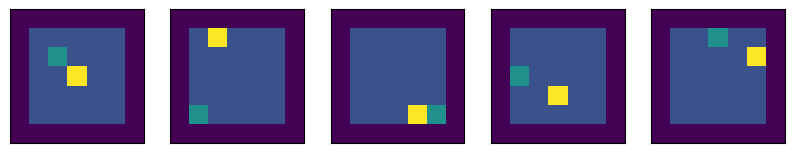

In [2]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Model

## Training

In [4]:
reward_history_agent=[0]
EPOCHS=1000
env_ = get_env()
agent=new_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history)

0/1000 - 0
50/1000 - 0
100/1000 - -0.002496666507795453


In [ ]:
reward_history_deep=[0]
EPOCHS=1000
env_ = get_env()
agent=agent_deep(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_deep[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_deep.append(np.mean(rewards))
plt.plot(reward_history)

0/1000 - 0
50/1000 - 0
100/1000 - -0.0014566666213795543
150/1000 - 0.007956666871905327
200/1000 - -0.00029666678165085614
250/1000 - 0.007913333363831043
300/1000 - -0.09999999403953552
350/1000 - -0.09999999403953552
400/1000 - -0.09999999403953552
450/1000 - -0.09999999403953552


KeyboardInterrupt: 

2024-04-28 12:14:39.703354: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0/1000 - 0
50/1000 - 0
100/1000 - 0.0005233331467024982
150/1000 - 0.005713332910090685
200/1000 - 0.006900000385940075
250/1000 - 0.0049833329394459724
300/1000 - 0.0037133328150957823
350/1000 - 0.00602333340793848
400/1000 - 0.001146666705608368
450/1000 - 0.0006133333663456142
500/1000 - 0.0021433334331959486
550/1000 - 0.002386666601523757
600/1000 - 0.0005233333795331419
650/1000 - 0.00024666666286066175
700/1000 - 0.0024666667450219393
750/1000 - 0.0006600000197067857
800/1000 - 0.0003500000457279384
850/1000 - 2.6666664780350402e-05
900/1000 - 0.0010400000028312206
950/1000 - 0.000303333334159106


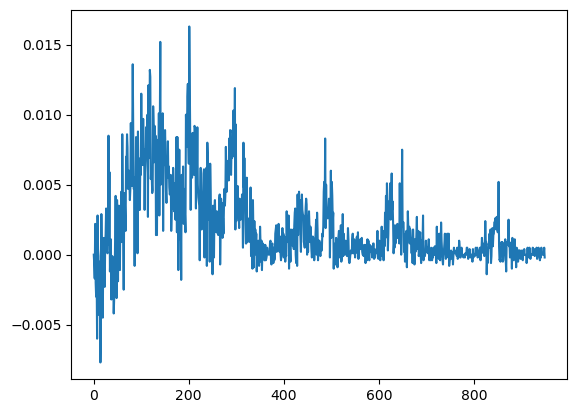

In [ ]:
reward_history_conv=[0]
EPOCHS=1000
env_ = get_env()
agent=conv_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history)

In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state() # this is the state
    state=tf.reshape(state, (1000, ))
    original_probs=agent.actor(state)
    samples = tf.random.categorical(math.log(original_probs), 1)[:, 0]
    
    reward=[]
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = samples
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

In [6]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:02<00:00, 480.70it/s]


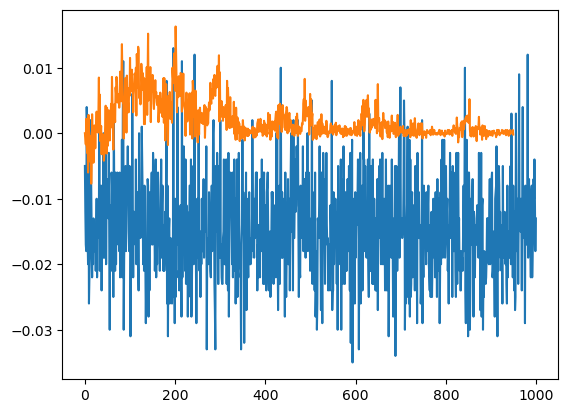

In [14]:
plt.plot(random_rewards)
plt.plot(reward_history)